In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
import calendar

In [188]:
import os
import zipfile
os.listdir('crime_dataset')
os.environ['KAGGLE_USERNAME']='jinoma'
os.environ['KAGGLE_KEY']='e449aae37f4bbf2354ab3e2724c0c760'

In [190]:
!kaggle datasets download -d arpitsinghaiml/u-s-crime-dataset

Dataset URL: https://www.kaggle.com/datasets/arpitsinghaiml/u-s-crime-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
u-s-crime-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [191]:
!kaggle datasets download -d arpitsinghaiml/u-s-crime-dataset

Dataset URL: https://www.kaggle.com/datasets/arpitsinghaiml/u-s-crime-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
u-s-crime-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [192]:
with zipfile.ZipFile("u-s-crime-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("crime_dataset")

In [193]:
file_path = "crime_dataset/Crime_Data_from_2020_to_Present.csv"

In [194]:
['Crime_Data_from_2020_to_Present.csv', 'Crime_Data_from_2010_to_2019.csv']

['Crime_Data_from_2020_to_Present.csv', 'Crime_Data_from_2010_to_2019.csv']

In [195]:
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [196]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [197]:

summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
summary['Null values'] = df.isna().sum()
summary['Unique values'] = df.nunique().values
summary['Total values'] = df.count().values
display(summary)

,Data Type,Null values,Unique values,Total values
DR_NO,int64,0,982638,982638
Date Rptd,object,0,1735,982638
DATE OCC,object,0,1735,982638
TIME OCC,int64,0,1439,982638
AREA,int64,0,21,982638
AREA NAME,object,0,21,982638
Rpt Dist No,int64,0,1209,982638
Part 1-2,int64,0,2,982638
Crm Cd,int64,0,140,982638
Crm Cd Desc,object,0,140,982638


In [199]:
print("Before:")
print(df['Vict Age'].unique())

df_cleaned = df[df['Vict Age'] > 0].copy() # Filters the DataFrame to keep only rows with Vict Age > 0

print("After:")
print(df_cleaned['Vict Age'].unique())

Before:
[  0  47  19  28  41  25  27  24  26   8   7  56  22  23  31  30  57  12
  46  51  37  20  29  33  34  15  65  59   9  35  50  64  79  40  44  32
  16  21  42   6  72  10  60  36  18  63  17   5  39  62  58  45  54  14
  71  69  49  38  13  61  -2  43  78  67  53  11  48  73  52  68  81  80
   3  55  89  70  77  83  91  82  75  76  74  -1   2  66  84  -3   4  87
  86  85  90  99  96  88  92  94  93  95  97  98 120  -4]
After:
[ 47  19  28  41  25  27  24  26   8   7  56  22  23  31  30  57  12  46
  51  37  20  29  33  34  15  65  59   9  35  50  64  79  40  44  32  16
  21  42   6  72  10  60  36  18  63  17   5  39  62  58  45  54  14  71
  69  49  38  13  61  43  78  67  53  11  48  73  52  68  81  80   3  55
  89  70  77  83  91  82  75  76  74   2  66  84   4  87  86  85  90  99
  96  88  92  94  93  95  97  98 120]


In [15]:
print("Before: ")
print(df['Date Rptd'])
df['Date Rptd'] = df['Date Rptd'].apply(lambda x: x.split()[0])

print("After: ")
print(df['Date Rptd'])

Before: 
0         03/01/2020 12:00:00 AM
1         02/09/2020 12:00:00 AM
2         11/11/2020 12:00:00 AM
3         05/10/2023 12:00:00 AM
4         08/18/2022 12:00:00 AM
                   ...          
982633    08/20/2024 12:00:00 AM
982634    07/24/2024 12:00:00 AM
982635    01/15/2024 12:00:00 AM
982636    04/24/2024 12:00:00 AM
982637    08/13/2024 12:00:00 AM
Name: Date Rptd, Length: 982638, dtype: object
After: 
0         03/01/2020
1         02/09/2020
2         11/11/2020
3         05/10/2023
4         08/18/2022
             ...    
982633    08/20/2024
982634    07/24/2024
982635    01/15/2024
982636    04/24/2024
982637    08/13/2024
Name: Date Rptd, Length: 982638, dtype: object


In [16]:
print("Before: ")
print(df['DATE OCC'])
df['DATE OCC'] = df['DATE OCC'].apply(lambda x: x.split()[0])

print("After: ")
print(df['DATE OCC'])

Before: 
0         03/01/2020 12:00:00 AM
1         02/08/2020 12:00:00 AM
2         11/04/2020 12:00:00 AM
3         03/10/2020 12:00:00 AM
4         08/17/2020 12:00:00 AM
                   ...          
982633    08/17/2024 12:00:00 AM
982634    07/23/2024 12:00:00 AM
982635    01/15/2024 12:00:00 AM
982636    04/24/2024 12:00:00 AM
982637    08/12/2024 12:00:00 AM
Name: DATE OCC, Length: 982638, dtype: object
After: 
0         03/01/2020
1         02/08/2020
2         11/04/2020
3         03/10/2020
4         08/17/2020
             ...    
982633    08/17/2024
982634    07/23/2024
982635    01/15/2024
982636    04/24/2024
982637    08/12/2024
Name: DATE OCC, Length: 982638, dtype: object


In [17]:
def convert_time(val):
    time_str = str(val).zfill(4) # Pad with zeros to ensure 4 digits (e.g., 3 becomes '0003')
    hour = int(time_str[:2])
    if 0 <= hour < 12:
        period = "AM"
        if hour == 0:
            hour = 12
    else:
        period = "PM"
        new_hour = hour % 12
        if new_hour == 0:
            hour = 12
        else:
            hour = new_hour

    minute = int(time_str[2:])
    
    return f"{hour:02d}:{minute:02d} {period}" # Formats into 12-hour time with AM/PM

print("Before: ")
print(df['TIME OCC'])
df['TIME OCC'] = df['TIME OCC'].apply(convert_time)

print("After: ")
print(df['TIME OCC'])

Before: 
0         2130
1         1800
2         1700
3         2037
4         1200
          ... 
982633    2300
982634    1400
982635     100
982636    1500
982637    2300
Name: TIME OCC, Length: 982638, dtype: int64
After: 
0         09:30 PM
1         06:00 PM
2         05:00 PM
3         08:37 PM
4         12:00 PM
            ...   
982633    11:00 PM
982634    02:00 PM
982635    01:00 AM
982636    03:00 PM
982637    11:00 PM
Name: TIME OCC, Length: 982638, dtype: object


In [19]:
print("Before: ", df.loc[1, 'Mocodes']) # Sample row from the 'Mocodes' column. It's a string of space-separated code

# Goes through each row in the 'Mocodes' column and transforms a string of space-separated codes into a list of string codes. If the row is empty, create an empty list instead.
df['Mocodes'] = df['Mocodes'].apply(lambda x: x.split() if pd.notnull(x) else [])

print("After: ", df.loc[1, 'Mocodes']) # After refining, it's now a list of strings

Before:  1822 1402 0344
After:  ['1822', '1402', '0344']


In [20]:
print("All possible data values in 'Vict Sex' column (before): ", df['Vict Sex'].unique()) 
codes = {"M": "Male", "F": "Female", "X": "Unknown", "H": "Intersex"}
df["Vict Sex"] = df["Vict Sex"].map(codes)
print("After: ", df['Vict Sex'].unique())

All possible data values in 'Vict Sex' column (before):  ['M' 'X' 'F' nan 'H' '-']
After:  ['Male' 'Unknown' 'Female' nan 'Intersex']


In [21]:

print("Before: ", df['Vict Descent'].unique())
descent_codes = {"A": "Other Asian", "B": "Black", "C": "Chinese", "D": "Cambodian", 
                 "F": "Filipino", "G": "Guamanian", "H": "Hispanic/Latin/Mexican", 
                 "I": "American Indian/Alaskan Native", "J": "Japanese", "K": "Korean", 
                 "L": "Laotian", "O": "Other", "P": "Pacific Islander", "S": "Samoan", 
                 "U": "Hawaiian", "V": "Vietnamese", "W": "White", "X": "Unknown", "Z": "Asian Indian"
                 }
df["Vict Descent"] = df["Vict Descent"].map(descent_codes)
print("After: ", df['Vict Descent'].unique())

Before:  ['O' 'X' 'H' 'B' 'W' nan 'A' 'K' 'C' 'J' 'F' 'I' 'V' 'S' 'P' 'Z' 'G' 'U'
 'D' 'L' '-']
After:  ['Other' 'Unknown' 'Hispanic/Latin/Mexican' 'Black' 'White' nan
 'Other Asian' 'Korean' 'Chinese' 'Japanese' 'Filipino'
 'American Indian/Alaskan Native' 'Vietnamese' 'Samoan' 'Pacific Islander'
 'Asian Indian' 'Guamanian' 'Hawaiian' 'Cambodian' 'Laotian']


# Analysis & Visualization

In [23]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

array([[<Axes: title={'center': 'DR_NO'}>,
        <Axes: title={'center': 'AREA'}>,
        <Axes: title={'center': 'Rpt Dist No'}>,
        <Axes: title={'center': 'Part 1-2'}>],
       [<Axes: title={'center': 'Crm Cd'}>,
        <Axes: title={'center': 'Vict Age'}>,
        <Axes: title={'center': 'Premis Cd'}>,
        <Axes: title={'center': 'Weapon Used Cd'}>],
       [<Axes: title={'center': 'Crm Cd 1'}>,
        <Axes: title={'center': 'Crm Cd 2'}>,
        <Axes: title={'center': 'Crm Cd 3'}>,
        <Axes: title={'center': 'Crm Cd 4'}>],
       [<Axes: title={'center': 'LAT'}>, <Axes: title={'center': 'LON'}>,
        <Axes: >, <Axes: >]], dtype=object)

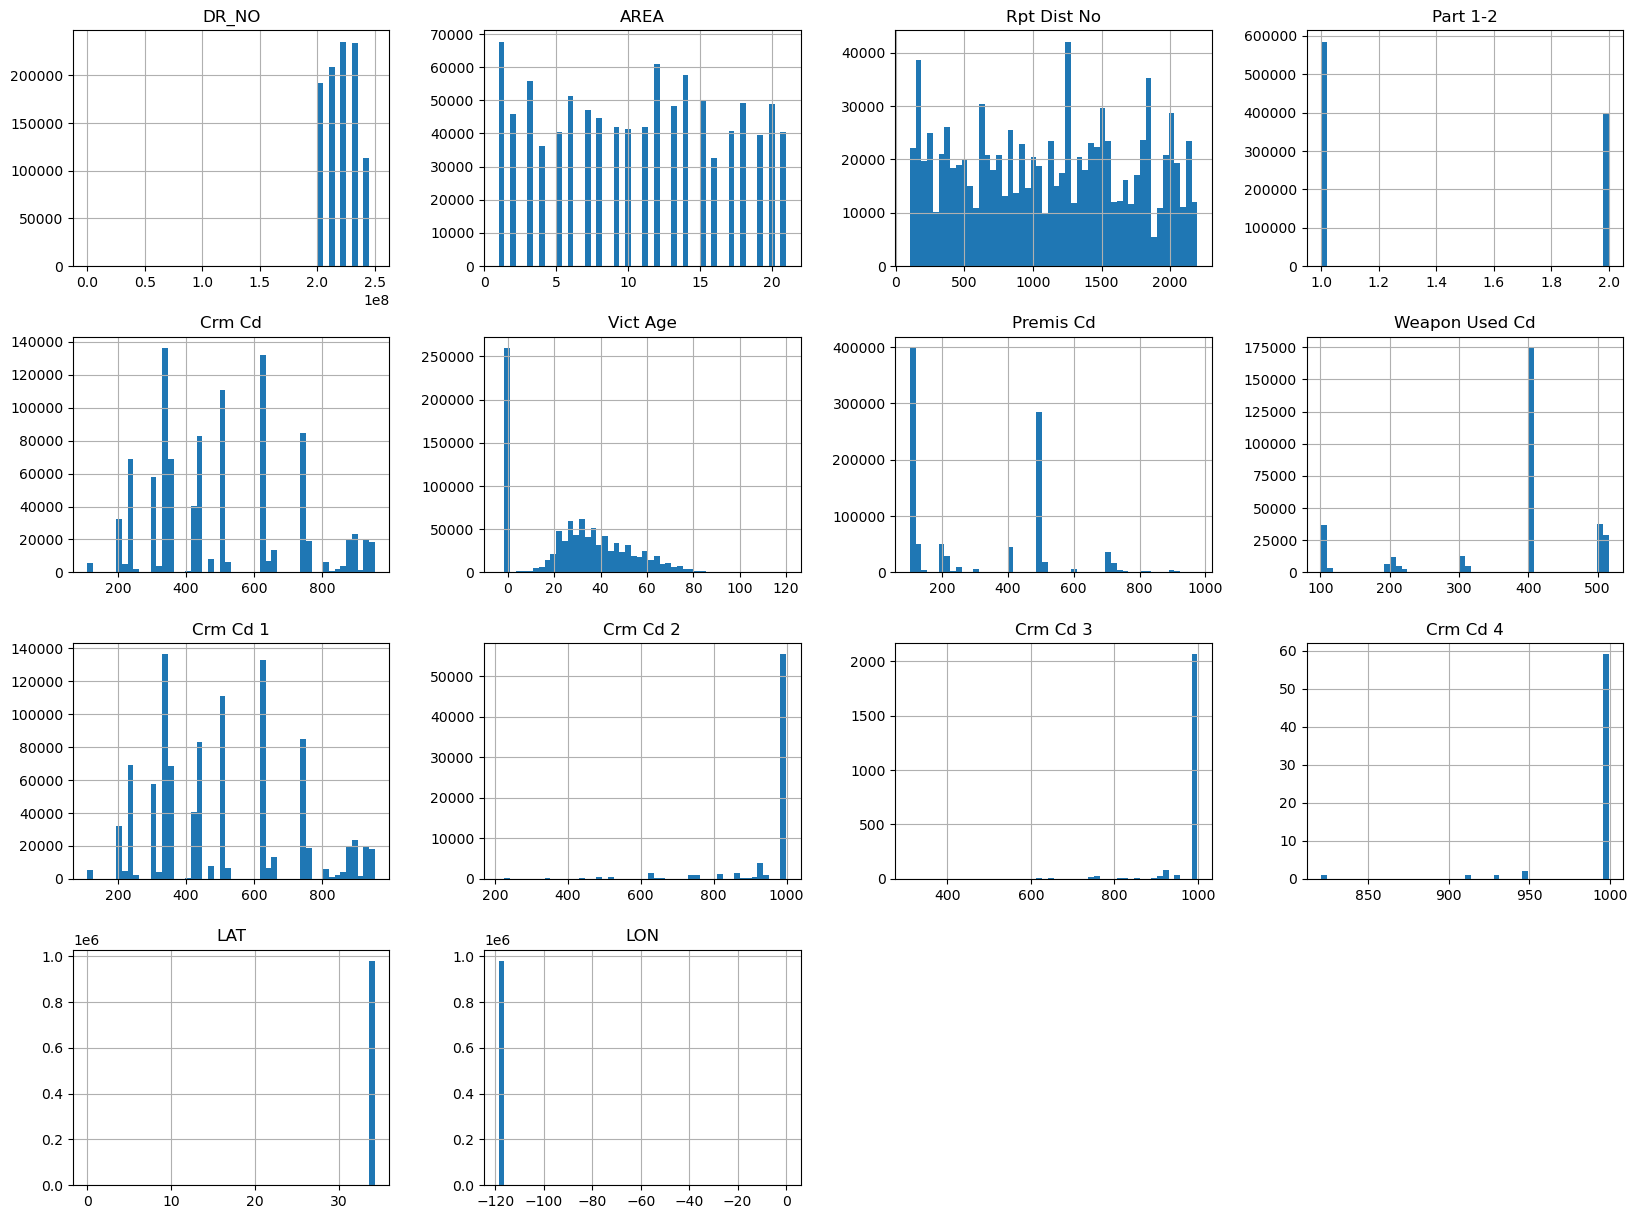

In [24]:
df.hist(bins=50, figsize=(20,15))

In [119]:
# The average age of victims varies by crime type.
# crimes with direct physical confrontation (like battery assault) seems to affect older individuals more,
# while crimes involving police show muc younger victim ages

avg_age_by_crime = df_cleaned.groupby('Crm Cd Desc')['Vict Age'].mean().head(10)
print(avg_age_by_crime)

Crm Cd Desc
ARSON                                                       45.013032
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                31.421875
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              38.079699
ATTEMPTED ROBBERY                                           39.043757
BATTERY - SIMPLE ASSAULT                                    40.490508
BATTERY ON A FIREFIGHTER                                    37.191860
BATTERY POLICE (SIMPLE)                                     31.430615
BATTERY WITH SEXUAL CONTACT                                 31.023630
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM    42.250000
BIGAMY                                                      30.250000
Name: Vict Age, dtype: float64


#### The age range of victims

In [125]:
min_vict_age = df_cleaned['Vict Age'].min()
max_vict_age = df_cleaned['Vict Age'].max()
print(f'Min Victim Age: {min_vict_age}\nMax Victim Age: {max_vict_age}')

Min Victim Age: 2
Max Victim Age: 120


#### The gender count of sexual assault victims

In [127]:
# sexual assault-related crimes overwhelmingly affect female victims
sex_crimes = df_cleaned[df_cleaned['Crm Cd Desc'].str.contains('SEXUAL|RAPE|MOLESTATION|SEX ASSAULT', case=False, na=False)]
sex_crimes['Vict Sex'].value_counts()

Vict Sex
F    9156
M     814
X      14
Name: count, dtype: int64

#### Average age of sex.assault victims

In [129]:
# there probably aren't enough male victims to create strong differentiation here?
sex_crimes_filtered = sex_crimes[sex_crimes['Vict Age'] > 0]
avg_age_by_gend = sex_crimes_filtered.groupby('Vict Sex')['Vict Age'].mean()
print(avg_age_by_gend)

Vict Sex
F    29.490935
M    29.020885
X    23.071429
Name: Vict Age, dtype: float64


### PM or AM? 

<Axes: title={'center': 'crimes am or pm'}, xlabel='Period'>

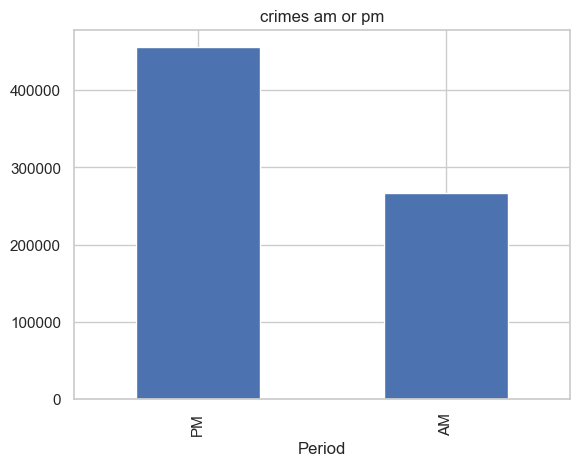

In [132]:
df_cleaned['Period'] = df['TIME OCC'].str[-2:] # pm or am
df_cleaned['Period'].value_counts().plot(kind='bar', title='crimes am or pm')

### Victim age distribution

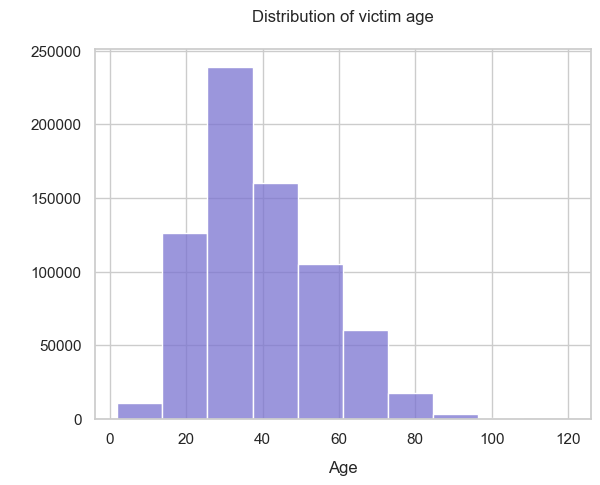

In [137]:
sns.histplot(df_cleaned['Vict Age'], bins=10, color='#7A73D1')
plt.title('Distribution of victim age', pad=20)
plt.xlabel('Age', labelpad=10)
plt.ylabel(' ')

plt.show()

### Top 10 Crime Types

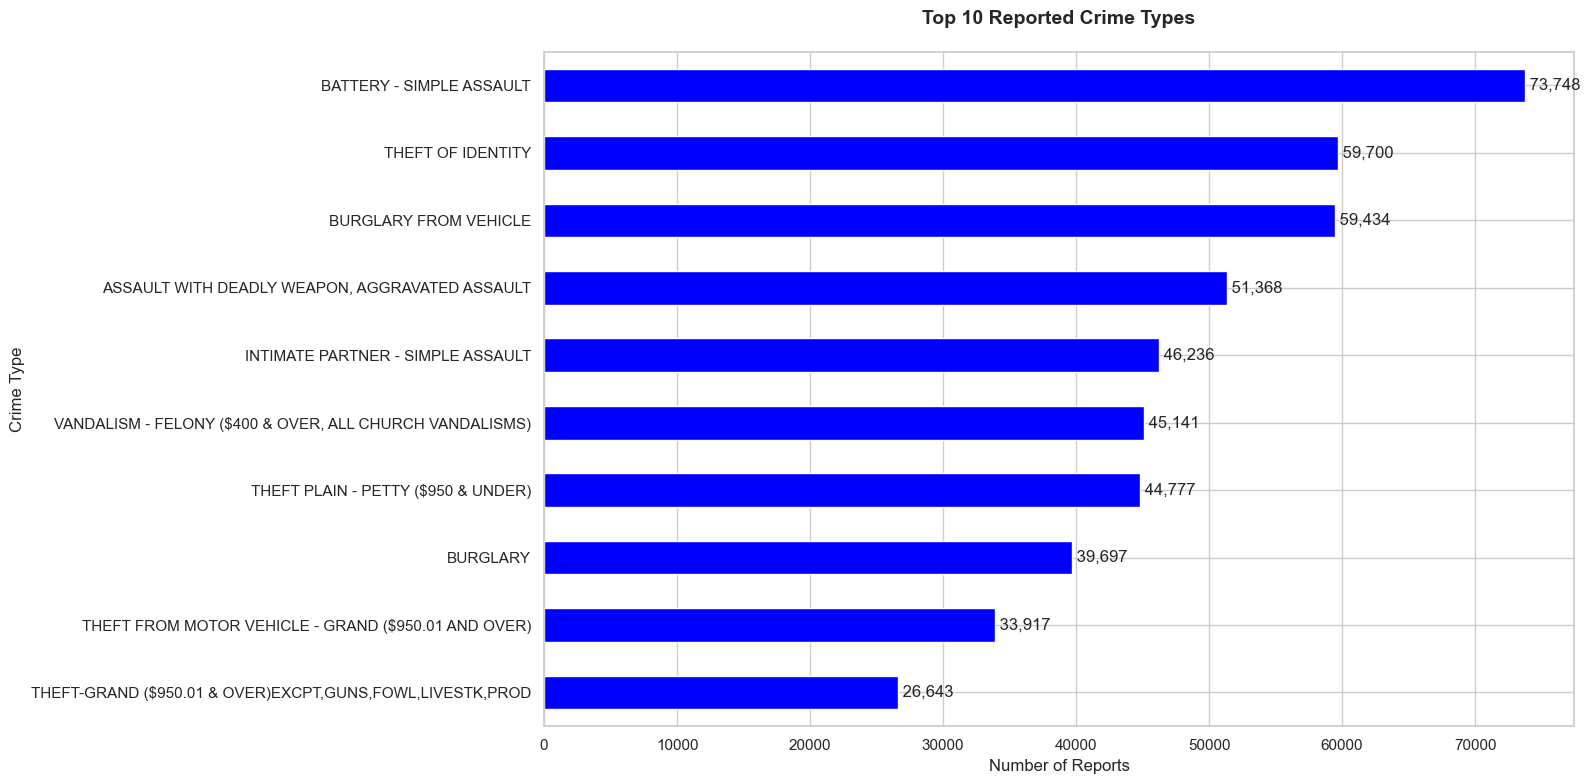

In [139]:
top_crimes = df_cleaned['Crm Cd Desc'].value_counts().head(10).sort_values(ascending=True)

sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(16, 8))
top_crimes.plot(kind='barh', color='blue')

# title and labels
plt.title('Top 10 Reported Crime Types', fontsize=14, weight='bold', pad=20)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)

# counts of each bar + text style
i = 0

for crime_count in top_crimes:
    plt.text(crime_count, i, str(f'{crime_count: ,}'), va='center', ha='left', fontsize=12)
    i +=1
    # print(crime_count, i)

plt.tight_layout()
plt.show()

### Crime counts by area name

Text(0, 0.5, 'Number of Crimes')

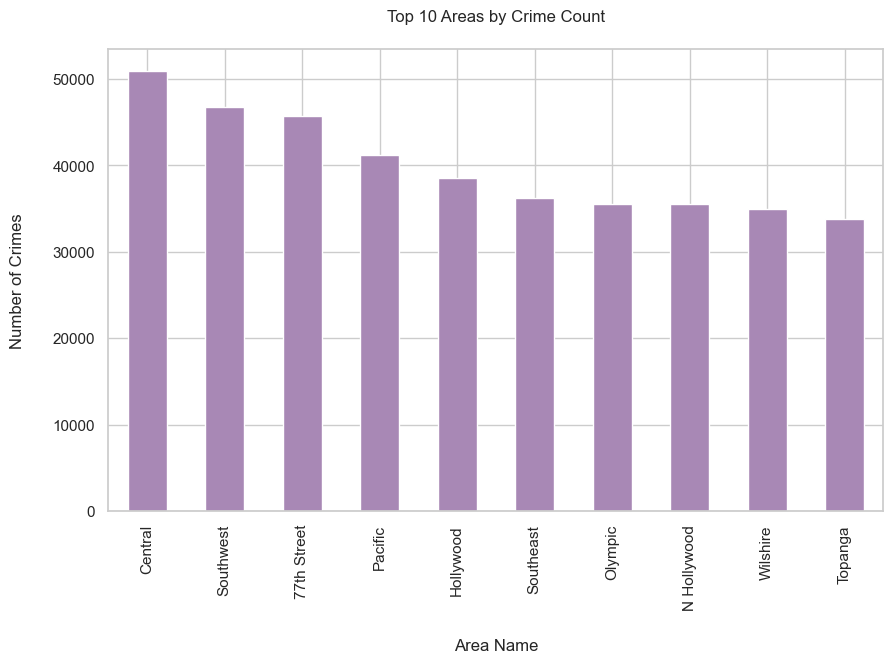

In [141]:
top_areas = df_cleaned['AREA NAME'].value_counts().head(10)

top_areas.plot(kind='bar', figsize=(10,6), color='#A888B5')

plt.title('Top 10 Areas by Crime Count', pad=20)
plt.xlabel('Area Name', labelpad=20)
plt.ylabel('Number of Crimes', labelpad=20)

### Assessing the Relationship Between Crime Types and Geographic Areas

In [62]:
# get 10 top areas & crimes
top_areas = df['AREA NAME'].value_counts().head(10).keys()
top_crimes = df['Crm Cd Desc'].value_counts().head(10).keys()

# filter dataframe based on top areas & crimes 
filtered_data = df[
    (df['AREA NAME'].isin(top_areas)) & 
    (df['Crm Cd Desc'].isin(top_crimes))
]

crime_distribution = filtered_data.groupby(['Crm Cd Desc', 'AREA NAME']).size().unstack(fill_value=0)

In [64]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(crime_distribution)

In [66]:
print(f'Chi-square statistic: {chi2}')
print(f'Degrees of freedom: {dof}')
print(f'p-value: {p}')

# 0.05 : standard significant threshold
if p < 0.05:
    print('!Statistically significant! crime type depends on the area.')
else:
    print('Statistically not significant - crime type and area may be independent.')

Chi-square statistic: 28901.529478461413
Degrees of freedom: 81
p-value: 0.0
!Statistically significant! crime type depends on the area.


### Distribution of Crime Victims by Gender

Vict Sex
Male        396769
Female      352750
Unknown      94561
Intersex       112
Name: count, dtype: int64
!Statistically significant! victim gender distribution is not uniform.




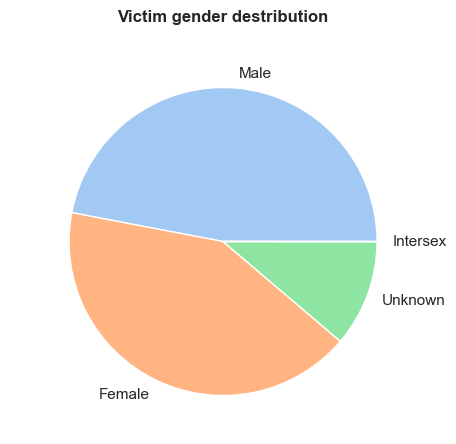

In [143]:
from scipy.stats import chisquare

gender_counts = df['Vict Sex'].value_counts()
print(gender_counts)

# expect frequencies are likely
# len = num of categories m,f,x] 
expected = [gender_counts.sum() / len(gender_counts)]  * len(gender_counts)
chi2, p = chisquare(f_obs=gender_counts, f_exp=expected)

if p < 0.05:
    print('!Statistically significant! victim gender distribution is not uniform.')
    print('\n')
else:
    print('Statistically not significant')
    print('\n')
    

# pie chart visualization
plt.figure(figsize=(5,5))
gender_counts.plot(
    kind='pie',
    colors=sns.color_palette('pastel')
)
plt.title('Victim gender destribution', fontweight='bold', pad=20)
plt.ylabel(' ')

plt.show()

### Are victim gender and crime type related?

In [145]:
top_crimes = df['Crm Cd Desc'].value_counts().head(10).keys()
filtered_data = df[df['Crm Cd Desc'].isin(top_crimes)]

# how often is each gender (vict) reported per crime type
gender_distribution = filtered_data.groupby(['Crm Cd Desc', 'Vict Sex']).size().unstack(fill_value=0)
                                            
chi2, p, dof, expected = chi2_contingency(gender_distribution)

In [147]:
print(f'Chi-square statistic: {chi2}')
print(f'Degrees of freedom: {dof}')
print(f'p-value: {p}')

# 0.05 : standard significant threshold
if p < 0.05:
    print('!Statistically significant! victim gender DEPENDS on crime type.')
else:
    print('Statistically not significant - gender and crime type may be independent.')

Chi-square statistic: 83610.22076847129
Degrees of freedom: 27
p-value: 0.0
!Statistically significant! victim gender DEPENDS on crime type.


### Victim count based on ethnicity

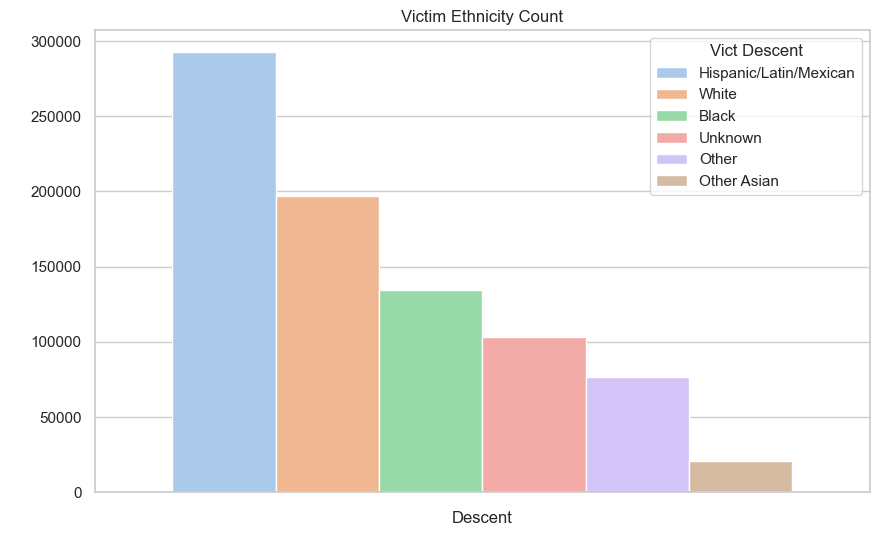

In [77]:
ethnicity_counts = df['Vict Descent'].value_counts().head(6)

plt.figure(figsize=(10, 6))
sns.barplot(y=ethnicity_counts, hue=ethnicity_counts.keys(), palette='pastel')
plt.title('Victim Ethnicity Count')
plt.xlabel('Descent')
plt.ylabel(' ')

plt.show()

### Victim gender by ethnicity

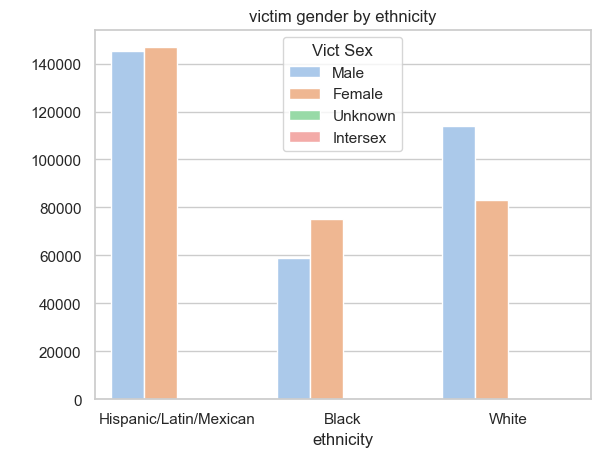

In [150]:
# top 3 most frequent ethnicities by vict. count
top3_desc = df['Vict Descent'].value_counts().head(3).keys()
desc_sub = df[df['Vict Descent'].isin(top3_desc)]

sns.countplot(data=desc_sub, x='Vict Descent', hue='Vict Sex', palette='pastel')

plt.title('victim gender by ethnicity')
plt.xlabel('ethnicity')
plt.ylabel(' ')

plt.show()

### Top 5 Crime Trends Over Time

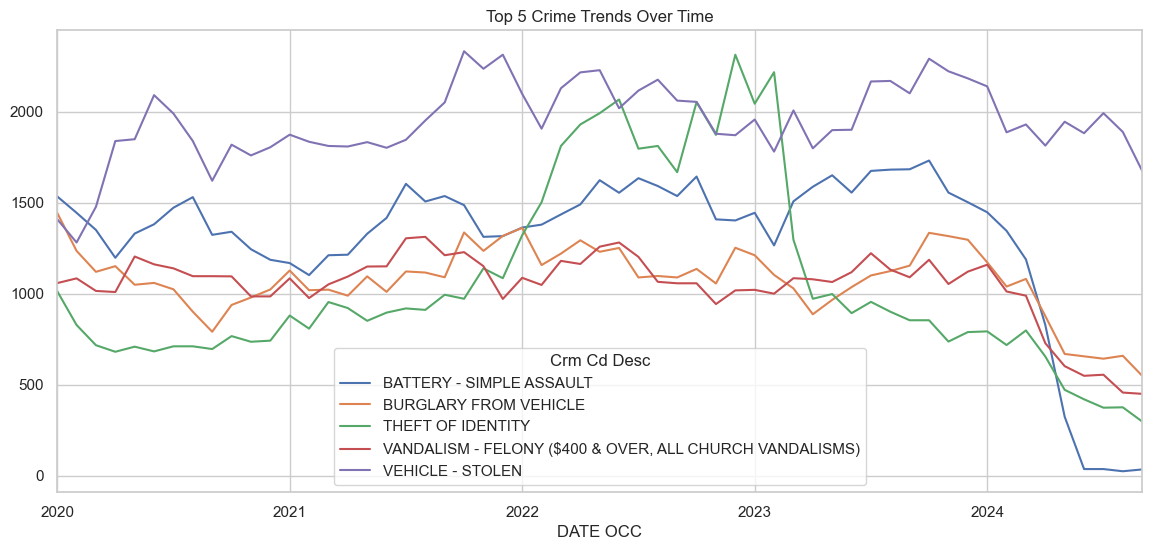

In [153]:
# top 5 most frequent crime types over time | long-term trends 
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
top_crimes = df['Crm Cd Desc'].value_counts().head(5).keys()
df_top = df[df['Crm Cd Desc'].isin(top_crimes)]
trend = df_top.groupby([df_top['DATE OCC'].dt.to_period('M'), 'Crm Cd Desc']).size().unstack()

trend.plot(figsize=(14,6), title='Top 5 Crime Trends Over Time');

### crime count by day of week

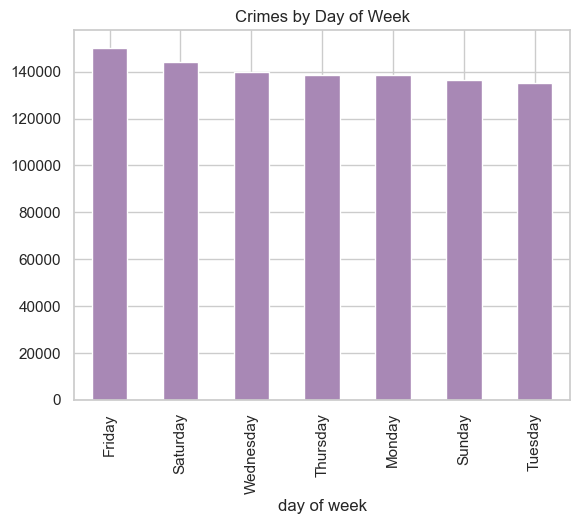

In [155]:
df['day of week'] = df['DATE OCC'].dt.day_name()
df['day of week'].value_counts().plot(kind='bar', title='Crimes by Day of Week', color='#A888B5');

### We imported an extra dataset (U.S. Unemployment rate) for our analysis

In [158]:
!kaggle datasets download -d guillemservera/us-unemployment-rates
with zipfile.ZipFile("us-unemployment-rates.zip", "r") as zip_ref:
    zip_ref.extractall("unemployment_dataset")

file_path2 = "unemployment_dataset/df_unemployment_rates.csv"
df2 = pd.read_csv(file_path2, encoding='ISO-8859-1')
df2

Dataset URL: https://www.kaggle.com/datasets/guillemservera/us-unemployment-rates
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
us-unemployment-rates.zip: Skipping, found more recently modified local copy (use --force to force download)


,date,overall_rate,age_16_17_rate,age_16_19_rate,age_18_19_rate,age_16_24_rate,age_20_24_rate,age_25_34_rate,age_25_54_rate,age_35_44_rate,age_45_54_rate,age_20plus_rate,age_25plus_rate,age_55plus_rate
0,1948-01-01,3.4,9.4,8.5,8.3,6.8,5.8,3.0,2.5,2.0,2.2,3.0,2.6,2.9
1,1948-02-01,3.8,13.1,10.0,8.2,7.7,6.3,3.3,2.9,2.5,2.8,3.3,2.9,3.1
2,1948-03-01,4.0,13.0,10.5,8.9,8.7,7.6,2.9,2.8,2.7,2.6,3.5,2.8,3.0
3,1948-04-01,3.9,11.2,9.5,8.6,7.8,6.8,3.4,3.0,2.9,2.6,3.5,3.0,3.0
4,1948-05-01,3.5,6.5,7.0,7.9,6.7,6.6,3.0,2.7,2.6,2.4,3.3,2.8,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,2024-01-01,3.7,10.0,10.6,10.8,7.3,5.9,3.9,3.3,3.0,2.7,3.4,3.2,2.9
913,2024-02-01,3.9,12.5,12.5,12.2,8.8,7.2,4.3,3.3,2.9,2.6,3.5,3.2,2.8
914,2024-03-01,3.8,14.1,12.6,11.5,8.8,7.1,4.1,3.2,2.6,2.9,3.5,3.1,2.6
915,2024-04-01,3.9,12.6,11.7,11.3,8.2,6.7,3.8,3.2,3.0,2.8,3.5,3.2,3.0


### Cleaned the unemployment dataset to get rows from 01/2020-05/2024. Two new columns were also created to represent the months and years of the rows.

In [161]:
df2["date"] = pd.to_datetime(df2["date"])
df2["date_month"], df2["date_year"] = df2["date"].dt.month, df2["date"].dt.year

df_2020_present = df2.drop(index = range(0,864), axis = "index")
df_2020_present.head(60)
month_name = calendar.month_name

df_2020_present["date_month"] = df_2020_present["date_month"].apply(lambda x: month_name[x])   
df_2020_present.tail(60) 

,date,overall_rate,age_16_17_rate,age_16_19_rate,age_18_19_rate,age_16_24_rate,age_20_24_rate,age_25_34_rate,age_25_54_rate,age_35_44_rate,age_45_54_rate,age_20plus_rate,age_25plus_rate,age_55plus_rate,date_month,date_year
864,2020-01-01,3.6,11.5,12.6,12.7,8.5,7.0,3.7,3.0,2.8,2.4,3.2,2.9,2.6,January,2020
865,2020-02-01,3.5,10.1,11.4,11.7,7.9,6.5,3.7,3.0,2.8,2.4,3.2,2.9,2.6,February,2020
866,2020-03-01,4.4,17.0,14.3,12.8,10.2,8.4,4.2,3.7,3.5,3.2,4.1,3.6,3.4,March,2020
867,2020-04-01,14.8,29.9,32.8,34.6,27.5,25.5,14.6,12.8,11.5,12.3,14.2,13.0,13.6,April,2020
868,2020-05-01,13.2,31.4,30.4,29.9,25.1,23.0,13.4,11.5,10.1,10.7,12.6,11.5,11.8,May,2020
869,2020-06-01,11.0,23.2,22.4,22.1,20.4,19.6,11.6,9.7,9.0,8.4,10.6,9.7,9.5,June,2020
870,2020-07-01,10.2,17.8,19.2,19.6,18.3,18.0,11.3,9.1,8.0,7.9,9.9,9.0,8.8,July,2020
871,2020-08-01,8.4,14.5,16.6,17.7,14.7,13.9,9.5,7.5,6.5,6.2,8.1,7.5,7.6,August,2020
872,2020-09-01,7.8,16.7,16.0,15.7,13.5,12.5,8.6,7.1,6.2,6.4,7.5,7.0,6.8,September,2020
873,2020-10-01,6.8,13.7,13.9,13.7,11.8,11.0,7.3,6.4,5.9,5.9,6.6,6.1,5.5,October,2020


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'overall_rate'}>,
        <Axes: title={'center': 'age_16_17_rate'}>,
        <Axes: title={'center': 'age_16_19_rate'}>],
       [<Axes: title={'center': 'age_18_19_rate'}>,
        <Axes: title={'center': 'age_16_24_rate'}>,
        <Axes: title={'center': 'age_20_24_rate'}>,
        <Axes: title={'center': 'age_25_34_rate'}>],
       [<Axes: title={'center': 'age_25_54_rate'}>,
        <Axes: title={'center': 'age_35_44_rate'}>,
        <Axes: title={'center': 'age_45_54_rate'}>,
        <Axes: title={'center': 'age_20plus_rate'}>],
       [<Axes: title={'center': 'age_25plus_rate'}>,
        <Axes: title={'center': 'age_55plus_rate'}>,
        <Axes: title={'center': 'date_year'}>, <Axes: >]], dtype=object)

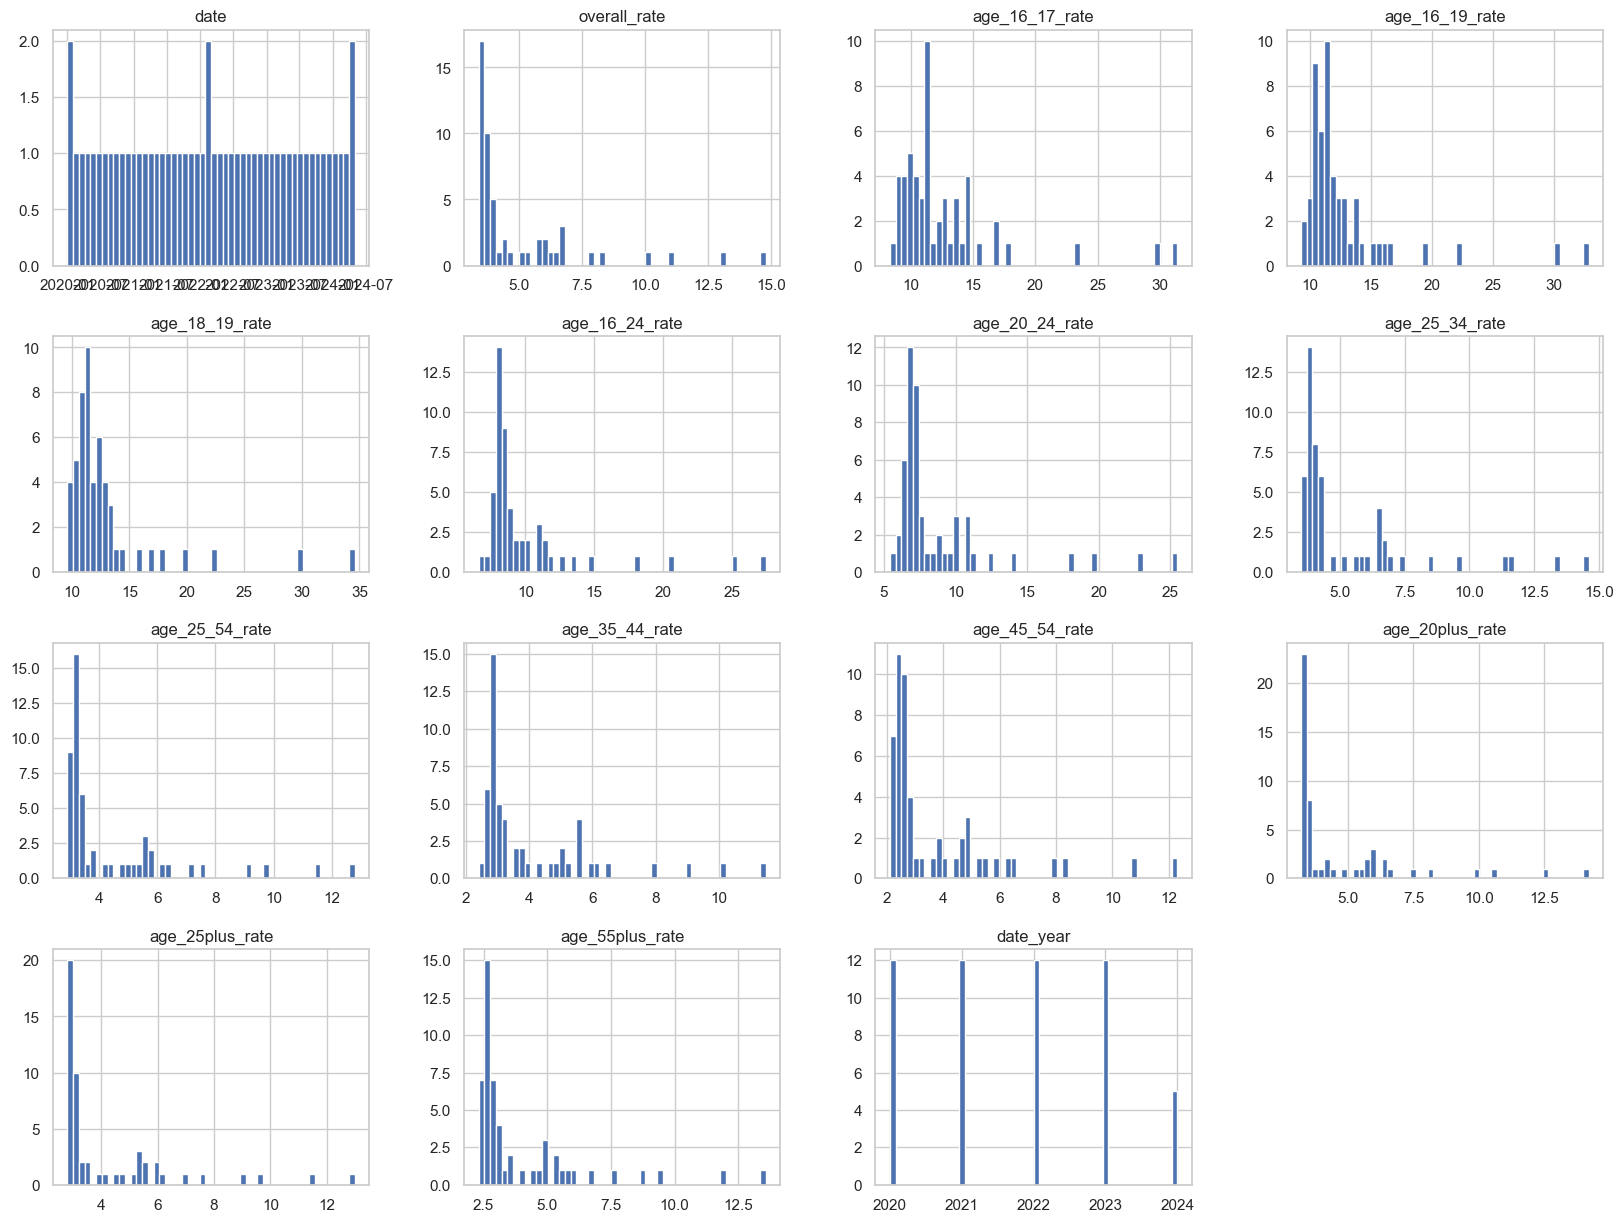

In [163]:
df_2020_present.hist(bins = 50, figsize = (20,15))

In [164]:
df_yearly = df_2020_present.groupby("date_year")["overall_rate"].mean()
df_yearly.head()

date_year
2020    8.091667
2021    5.350000
2022    3.633333
2023    3.625000
2024    3.860000
Name: overall_rate, dtype: float64

<Axes: xlabel='date_year', ylabel='overall_rate'>

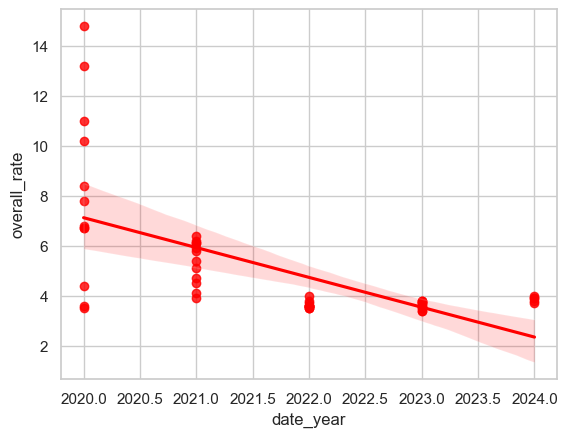

In [165]:
sns.regplot(data = df_2020_present, x = "date_year", y = "overall_rate", color = "red")

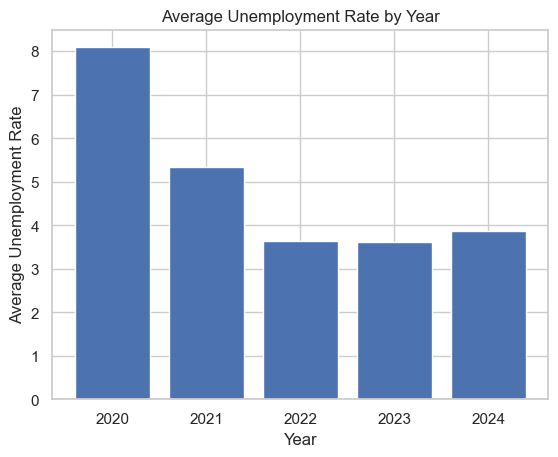

In [169]:
plt.bar(df_yearly.index, df_yearly.values)
plt.xlabel("Year")
plt.ylabel("Average Unemployment Rate")
plt.title("Average Unemployment Rate by Year")
plt.show()

<Axes: xlabel='date_month'>

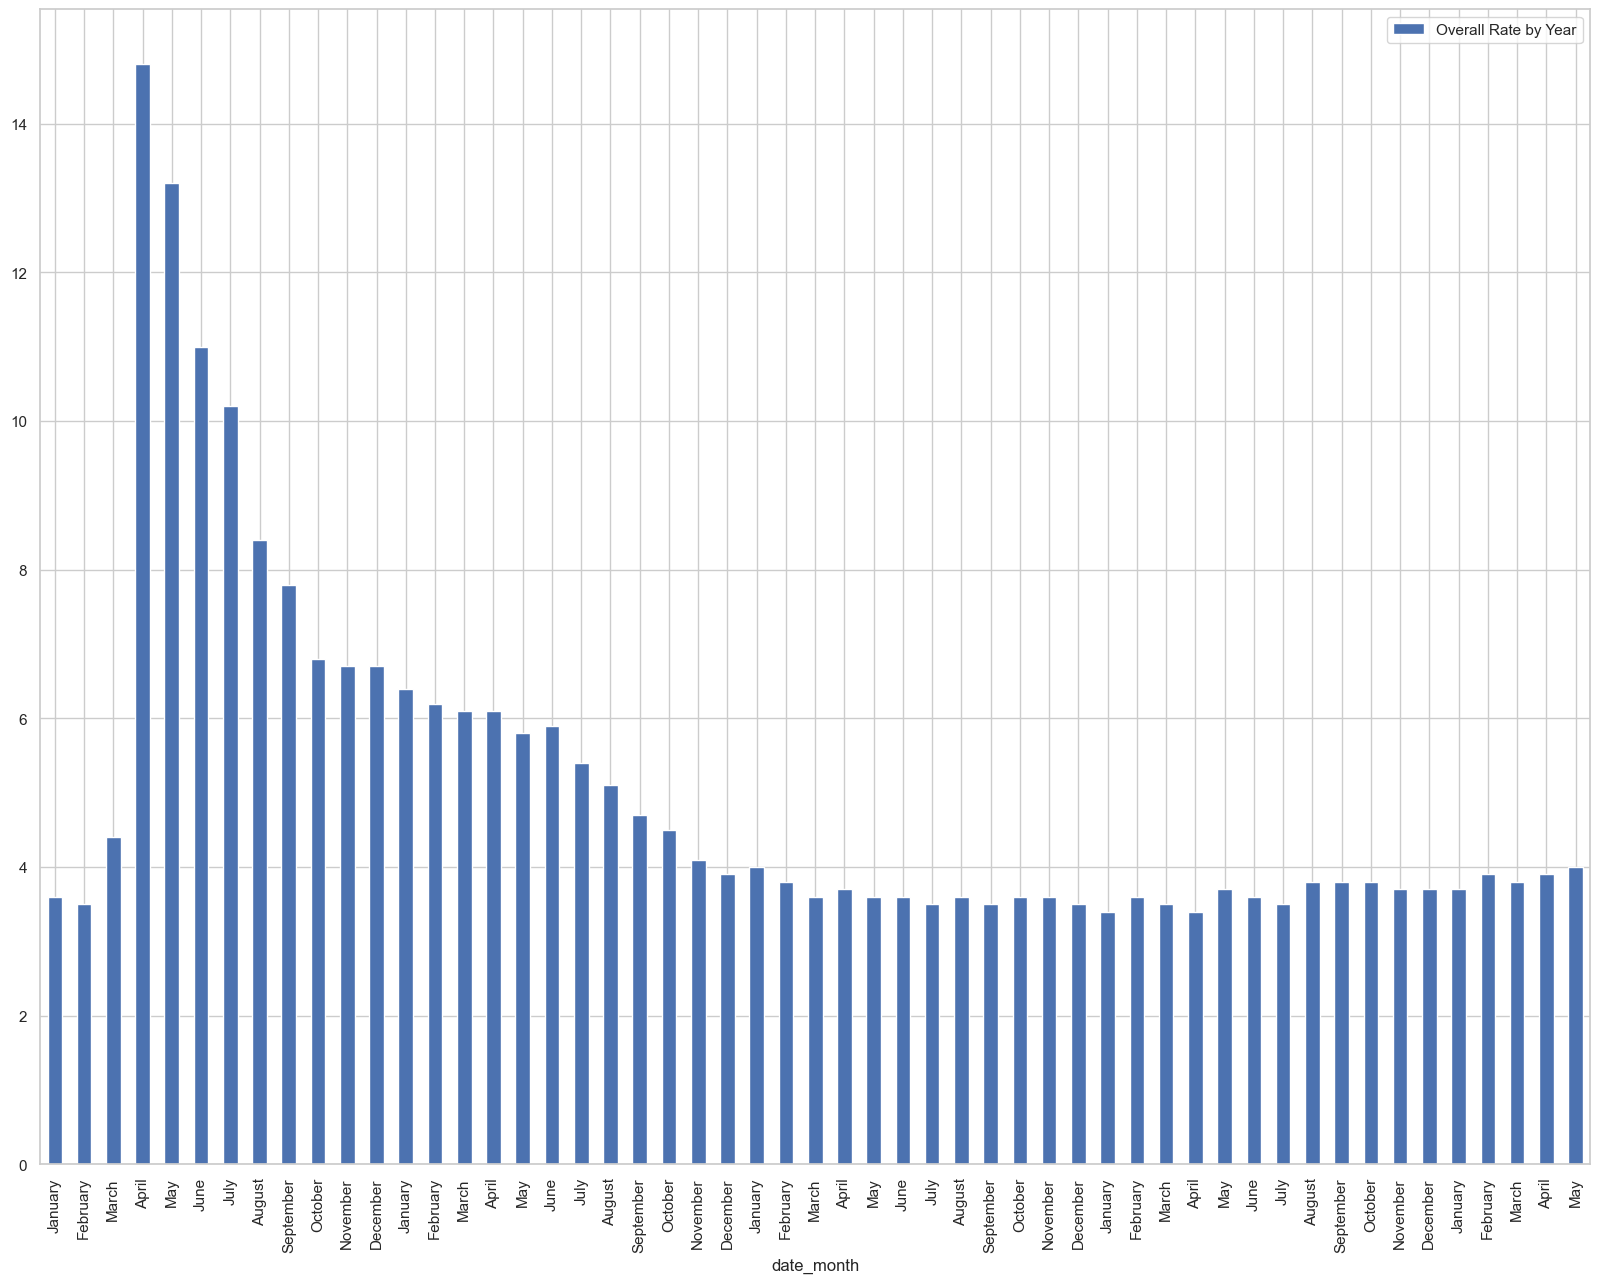

In [171]:
df_2020_present.plot(kind = "bar", x = "date_month", y = "overall_rate", label = "Overall Rate by Year", figsize = (20,15))

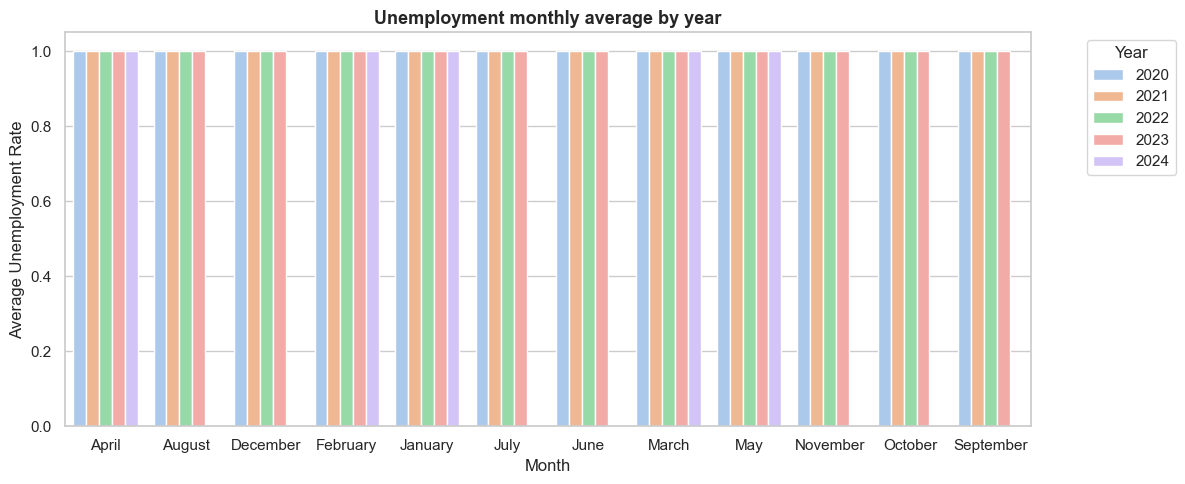

In [173]:
grouped = df_2020_present.groupby(["date_month", "date_year"], observed = True).size().reset_index(name = "overall_rate")
plt.figure(figsize=(12, 5))
sns.barplot(data = grouped, x = "date_month", y = "overall_rate", hue = "date_year" , palette = 'pastel')
plt.title("Unemployment monthly average by year", fontsize=13, weight='bold')
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate")
    
plt.legend(title='Year',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Axes: xlabel='date_year', ylabel='overall_rate'>

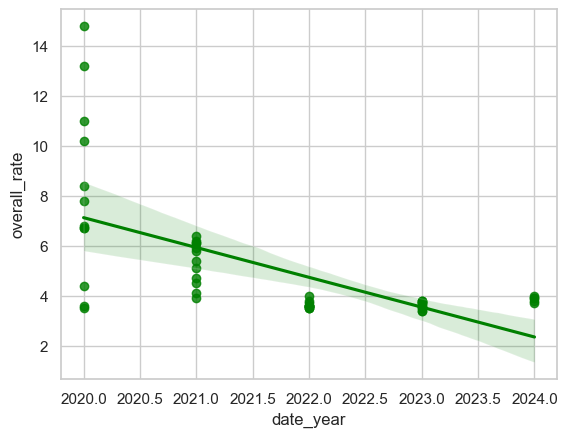

In [175]:
sns.regplot(data = df_2020_present, x = "date_year", y = "overall_rate", color = "green")

### We also want to combine two datasets (Unemployment rate and crime data) to analyze the correlation between the number of reported crimes and the unemployment rate.

In [178]:
df2['date'] = pd.to_datetime(df2['date']) # converts to datetime object
df2['month_year'] = df2['date'].dt.to_period('M') # creates a new column that contains only the month and year of the date
monthly_unemployment = df2[['month_year','overall_rate']] 
monthly_unemployment['month_year'] = monthly_unemployment['month_year'].dt.to_timestamp()

new_month_year = (monthly_unemployment['month_year'] >= '2020-01') & (monthly_unemployment['month_year'] <= '2024-12') # only include year from 2020 to 2024
filtered_unemployment = monthly_unemployment[new_month_year]

print(filtered_unemployment)


    month_year  overall_rate
864 2020-01-01           3.6
865 2020-02-01           3.5
866 2020-03-01           4.4
867 2020-04-01          14.8
868 2020-05-01          13.2
869 2020-06-01          11.0
870 2020-07-01          10.2
871 2020-08-01           8.4
872 2020-09-01           7.8
873 2020-10-01           6.8
874 2020-11-01           6.7
875 2020-12-01           6.7
876 2021-01-01           6.4
877 2021-02-01           6.2
878 2021-03-01           6.1
879 2021-04-01           6.1
880 2021-05-01           5.8
881 2021-06-01           5.9
882 2021-07-01           5.4
883 2021-08-01           5.1
884 2021-09-01           4.7
885 2021-10-01           4.5
886 2021-11-01           4.1
887 2021-12-01           3.9
888 2022-01-01           4.0
889 2022-02-01           3.8
890 2022-03-01           3.6
891 2022-04-01           3.7
892 2022-05-01           3.6
893 2022-06-01           3.6
894 2022-07-01           3.5
895 2022-08-01           3.6
896 2022-09-01           3.5
897 2022-10-01

/var/folders/6f/rprcx6wx4tn4mwnp4n5ggx440000gn/T/ipykernel_36032/2058322384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_unemployment['month_year'] = monthly_unemployment['month_year'].dt.to_timestamp()


In [180]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd']) # converts to datetime object

df['month_year'] = df['Date Rptd'].dt.to_period('M') # creates a new column that contains only the month and year of the date
monthly_crimes = df.groupby('month_year').size().reset_index(name='Crime Count') # groups the data by month and year and counts the number of crimes for each month
monthly_crimes['month_year'] = monthly_crimes['month_year'].dt.to_timestamp() 

combined_df = pd.merge(monthly_unemployment, monthly_crimes, on='month_year', how='inner')
print(combined_df) # shows the unemployement rate and the number of crimes for each month


   month_year  overall_rate  Crime Count
0  2020-01-01           3.6        16060
1  2020-02-01           3.5        16490
2  2020-03-01           4.4        15539
3  2020-04-01          14.8        15179
4  2020-05-01          13.2        16331
5  2020-06-01          11.0        16955
6  2020-07-01          10.2        16907
7  2020-08-01           8.4        16605
8  2020-09-01           7.8        15636
9  2020-10-01           6.8        16142
10 2020-11-01           6.7        15342
11 2020-12-01           6.7        15522
12 2021-01-01           6.4        16155
13 2021-02-01           6.2        15411
14 2021-03-01           6.1        16306
15 2021-04-01           6.1        16015
16 2021-05-01           5.8        16784
17 2021-06-01           5.9        17125
18 2021-07-01           5.4        18741
19 2021-08-01           5.1        18285
20 2021-09-01           4.7        18258
21 2021-10-01           4.5        18952
22 2021-11-01           4.1        18485
23 2021-12-01   

Correlation value between unemployment rate and monthly crimes reported: -0.4526


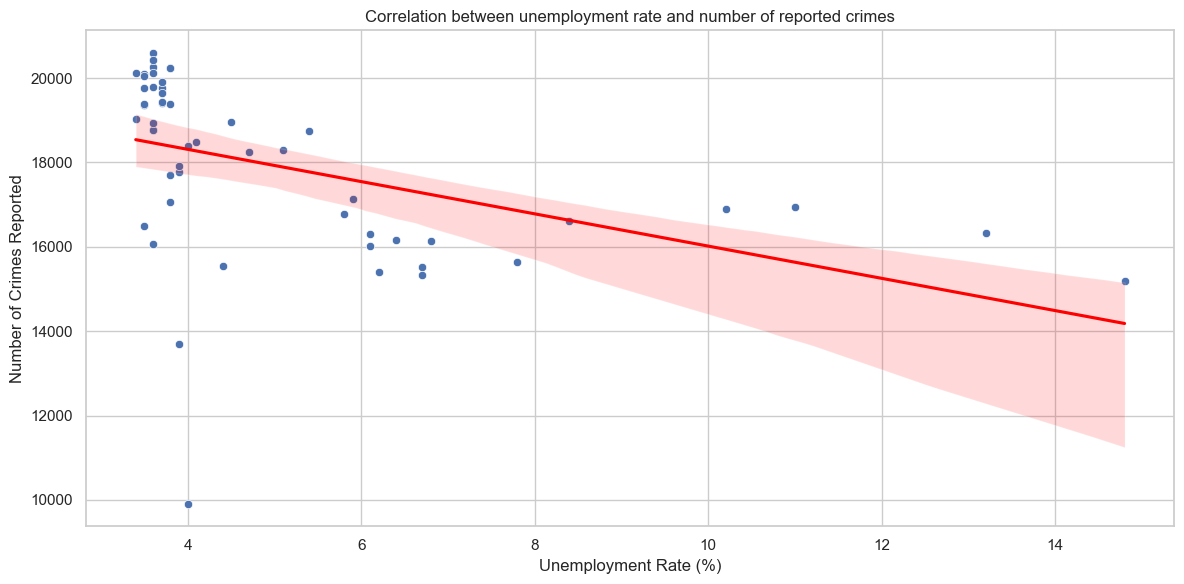

In [182]:
correlation = combined_df['overall_rate'].corr(combined_df['Crime Count'])
print(f"Correlation value between unemployment rate and monthly crimes reported: {correlation:.4f}")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_df, x='overall_rate', y='Crime Count')
sns.regplot(data=combined_df, x='overall_rate', y='Crime Count', scatter=False, color='red')
plt.title('Correlation between unemployment rate and number of reported crimes')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Number of Crimes Reported')
plt.grid(True)
plt.tight_layout()
plt.show()